# MACHINE LEARNING HACKATHON 2019
## TEAM EASY COMPANY

---

### _PROBLEM STATEMENT:-_

Predicting the different types of skin cancer like Melanocytic nevi, Actinic keratoses etc using Convolution Neural Network(CNN) which otherwise would have been diagnosed by expensive and time consuming methods like Histopathology, Confocal microscopy etc

## _INTRODUCTION:-_

As skin cancer is one of the most frequent cancers globally, accurate, non-invasive dermoscopy-based diagnosis becomes essential and promising. Our task is to predict seven disease classes with skin lesion images, including melanoma (MEL), melanocytic nevus (NV), basal cell carcinoma (BCC), actinic keratosis / Bowens disease (intraepithelial carcinoma) (AKIEC), benign keratosis (solar lentigo / seborrheic keratosis / lichen planus-like keratosis)(BKL), dermatofibroma (DF) and vascular lesion (VASC).

- **Melanocytic nevi**
- **Melanoma**
- **Benign keratosis-like lesions**
- **Basal cell carcinoma**
- **Actinic keratoses**
- **Vascular lesions**
- **Dermatofibroma**

## _Dataset information_

Dermoscopic lesion images were acquired from HAM10000
Dataset. A disease label for each image was determined histopathologically or diagnostically. A
training dataset for classification consisted of 10,015 images (327 AKIEC, 514 BCC, 1,099 BKL, 115 DF, 1,113 MEL, 6,705 NV,and 142 VASC samples) with the corresponding disease label (ground truth), and a validation set and a test set.

[Dataset](https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000)

# _STEP 1: Importing Essential Libraries_ 

In [2]:
import numpy as np
import pandas as pd
import os
from glob import glob
import keras
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from PIL import Image
np.random.seed(123)
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Step 2: _Data processing_

In [4]:
base_skin_dir = os.path.join('/home/mayur/Desktop', 'skin-cancer-mnist-ham10000')

imageid_path_dict = {os.path.splitext(os.path.basename(x))[0]: x
                   for x in glob(os.path.join(base_skin_dir, '*', '*.jpg'))}

lesion_dict = {     
                  'nv': 'Melanocytic nevi',
                  'mel': 'Melanoma',
                  'bkl': 'Benign keratosis-like lesions ',
                  'bcc': 'Basal cell carcinoma',
                  'akiec': 'Actinic keratoses',
                  'vasc': 'Vascular lesions',
                  'df': 'Dermatofibroma'
              }

### __Reading Dataset and adding new columns:__ 

In [5]:
dataset = pd.read_csv('/home/mayur/Desktop/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')

dataset['path'] = dataset['image_id'].map(imageid_path_dict.get)
dataset['cell_type'] = dataset['dx'].map(lesion_dict.get)
dataset['cell_codes'] = pd.Categorical(dataset['cell_type']).codes

In [6]:
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_codes
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2


## _Step 3:- Data Cleaning_

In [7]:
dataset.isnull().sum()

lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
path             0
cell_type        0
cell_codes       0
dtype: int64

In [8]:
dataset['age'].fillna((dataset['age'].mean()), inplace=True)

In [9]:
dataset.isnull().sum()

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
path            0
cell_type       0
cell_codes      0
dtype: int64

## **_Visualisations_**

In [10]:
def DIE():
    
    from IPython.display import HTML
    from IPython.display import display

    tag = HTML('''<script>
    code_show=true; 
    function code_toggle() 
    {
        if (code_show)
        {
            $('div.cell.code_cell.rendered.selected div.input').hide();
        } else 
        {
            $('div.cell.code_cell.rendered.selected div.input').show();
        }
        code_show = !code_show
    } 
    $( document ).ready(code_toggle);
    </script>
    <a href="javascript:code_toggle()">CODE</a>.''')
    display(tag)
DIE()

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

### _Cell type count bar diagram_

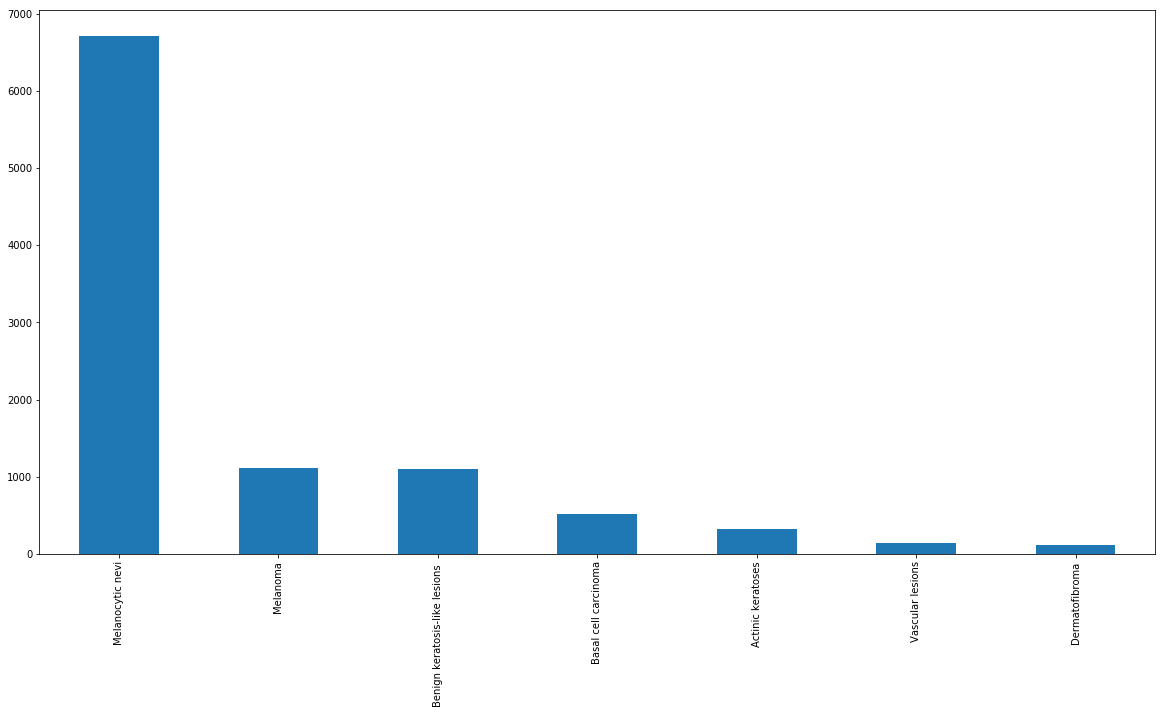

In [12]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize = (20, 10))
dataset['cell_type'].value_counts().plot(kind='bar', ax = ax1)

### _Method count bar diagram_

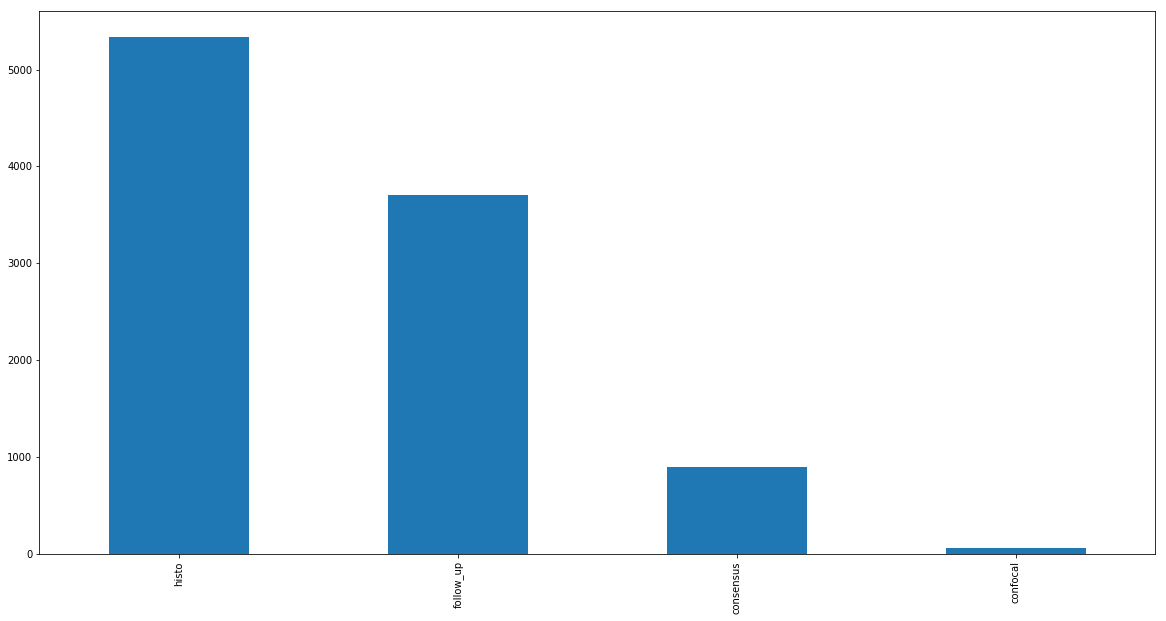

In [13]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize= (20, 10))
dataset['dx_type'].value_counts().plot(kind='bar')

### _Region count bar diagram_

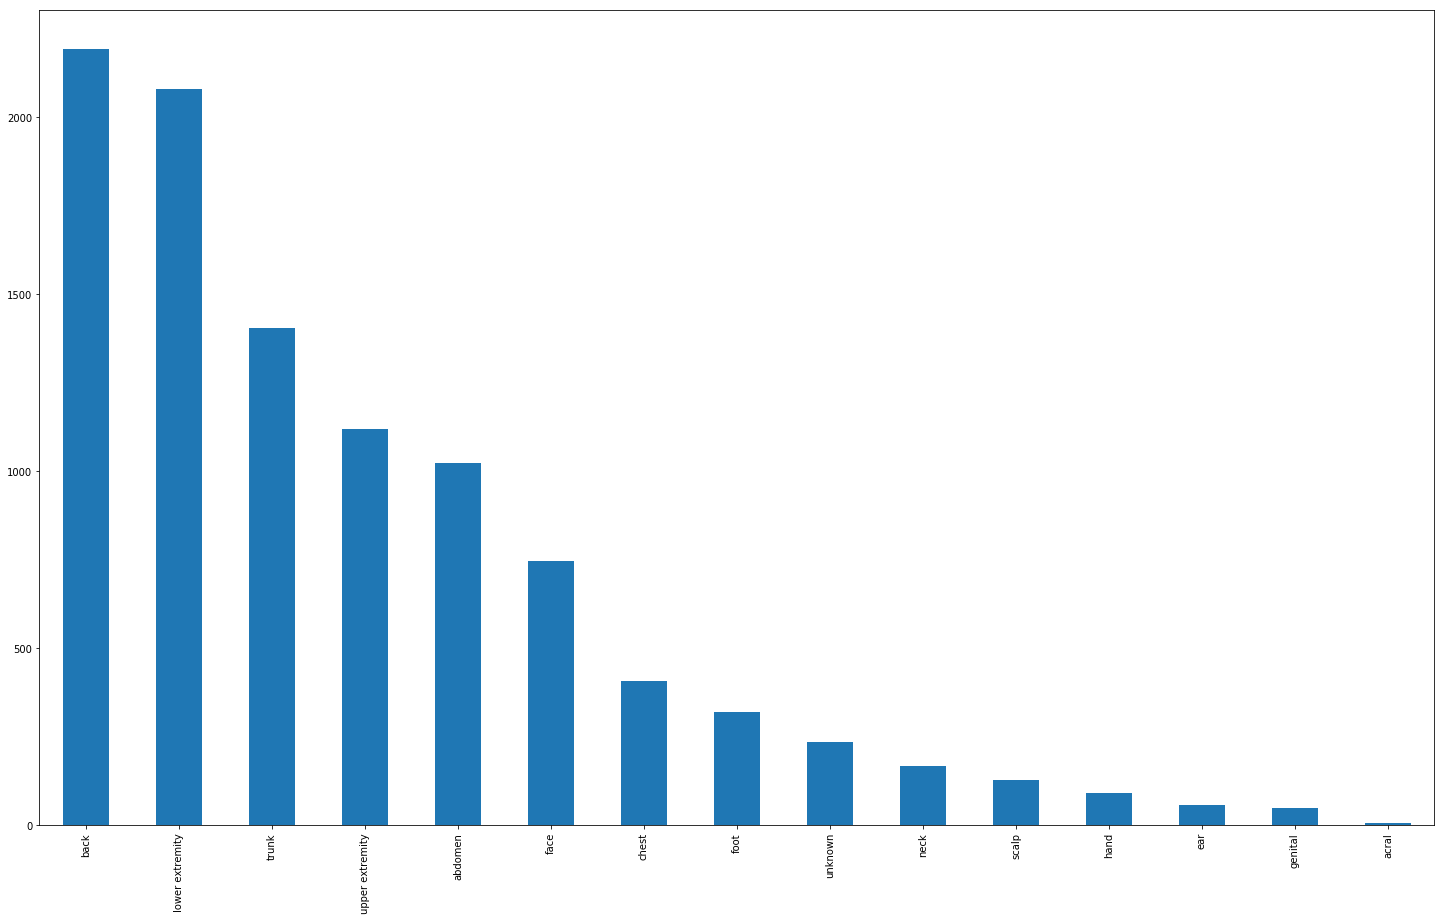

In [14]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize= (25, 15))
dataset['localization'].value_counts().plot(kind='bar')

### _Age count histogram_

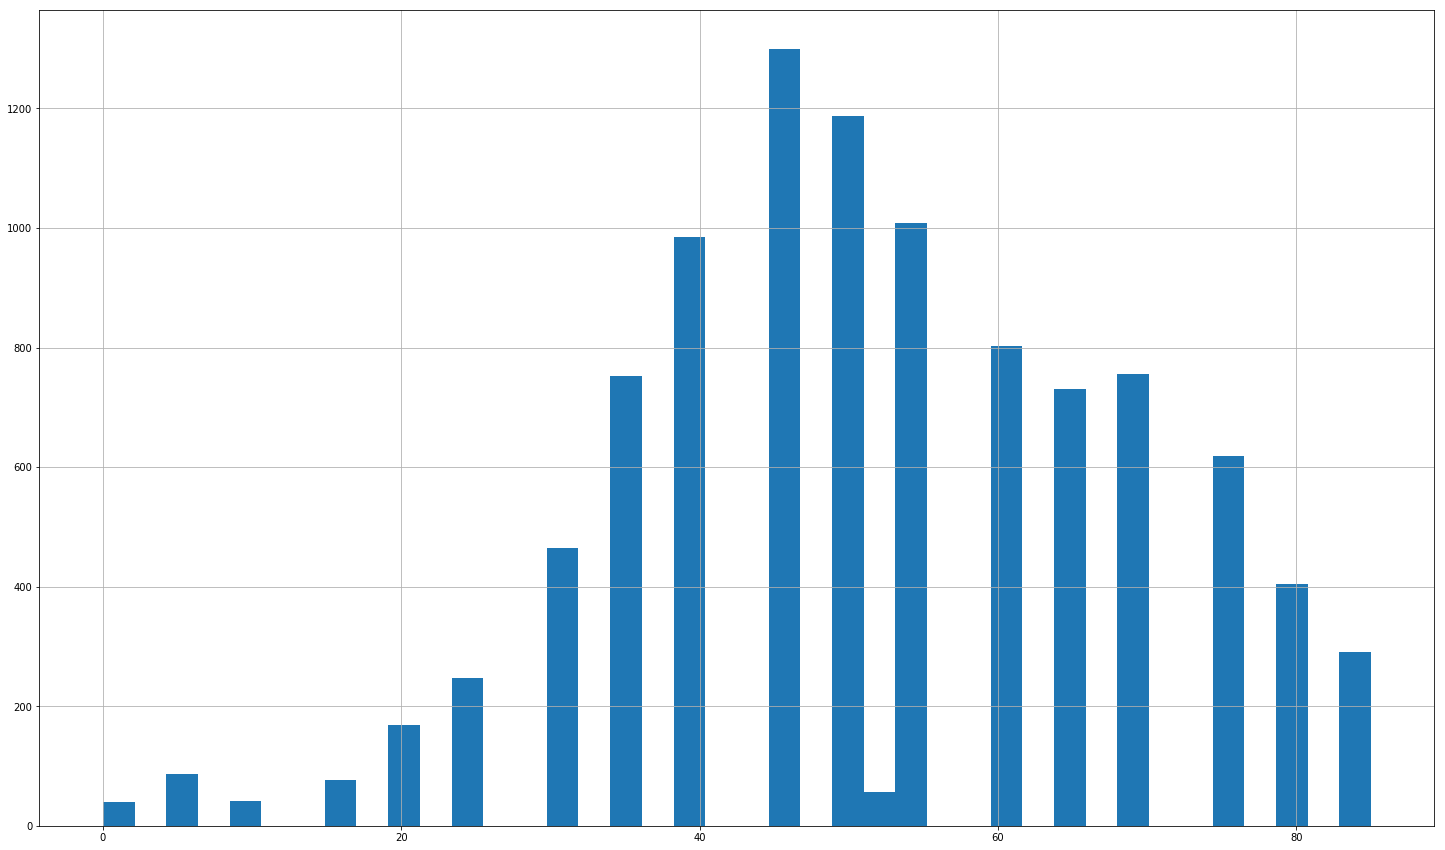

In [15]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize= (25, 15))
dataset['age'].hist(bins=40)

### _Cell type count histogram_

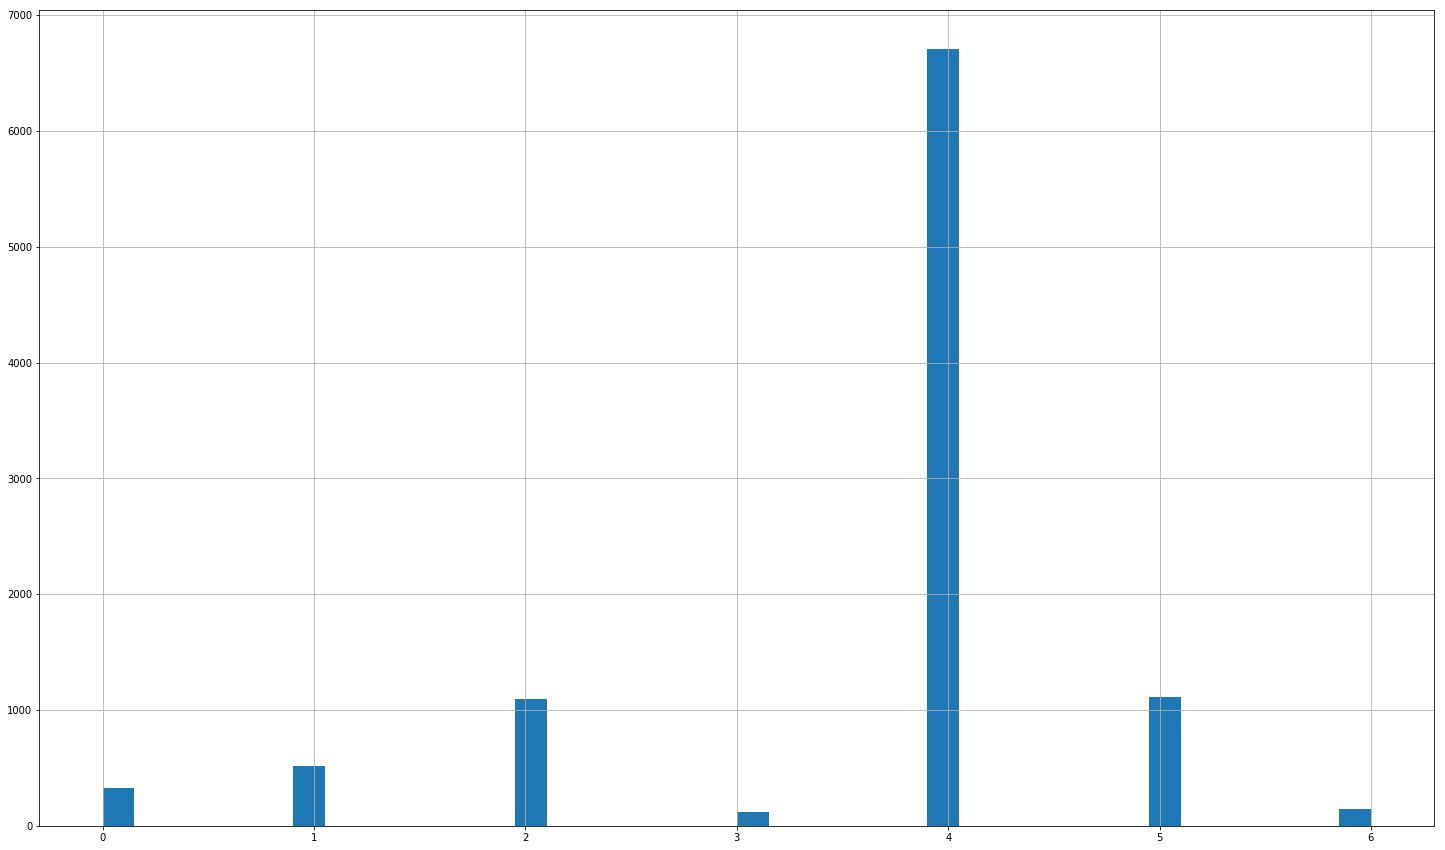

In [16]:
DIE()
fig, ax1 = plt.subplots(1, 1, figsize= (25, 15))
dataset['cell_codes'].hist(bins=40)

### _Step 4:-Resizing the images:-_

In this step images will be loaded into the column named image from the image path from the image folder. We also resize the images as the original dimension of images are 450 x 600 x3 which TensorFlow can't handle, so that's why we resize it into 64 x 64.

In [ ]:
dataset['image'] = dataset['path'].map(lambda x: np.asarray(Image.open(x).resize((64,64))))

In [17]:
dataset['image'] = dataset['path'].map(lambda x: np.asarray(Image.open(x).resize((64,64))))

In [18]:
dataset.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,path,cell_type,cell_codes,image
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2,"[[[193, 156, 197], [188, 153, 193], [194, 145,..."
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2,"[[[20, 12, 25], [22, 14, 27], [36, 25, 42], [6..."
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2,"[[[185, 129, 138], [191, 135, 148], [199, 147,..."
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2,"[[[23, 10, 17], [34, 21, 31], [63, 35, 47], [9..."
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,/home/mayur/Desktop/skin-cancer-mnist-ham10000...,Benign keratosis-like lesions,2,"[[[139, 94, 117], [160, 114, 140], [179, 134, ..."


### _Step 5:- Displaying Samples_ 

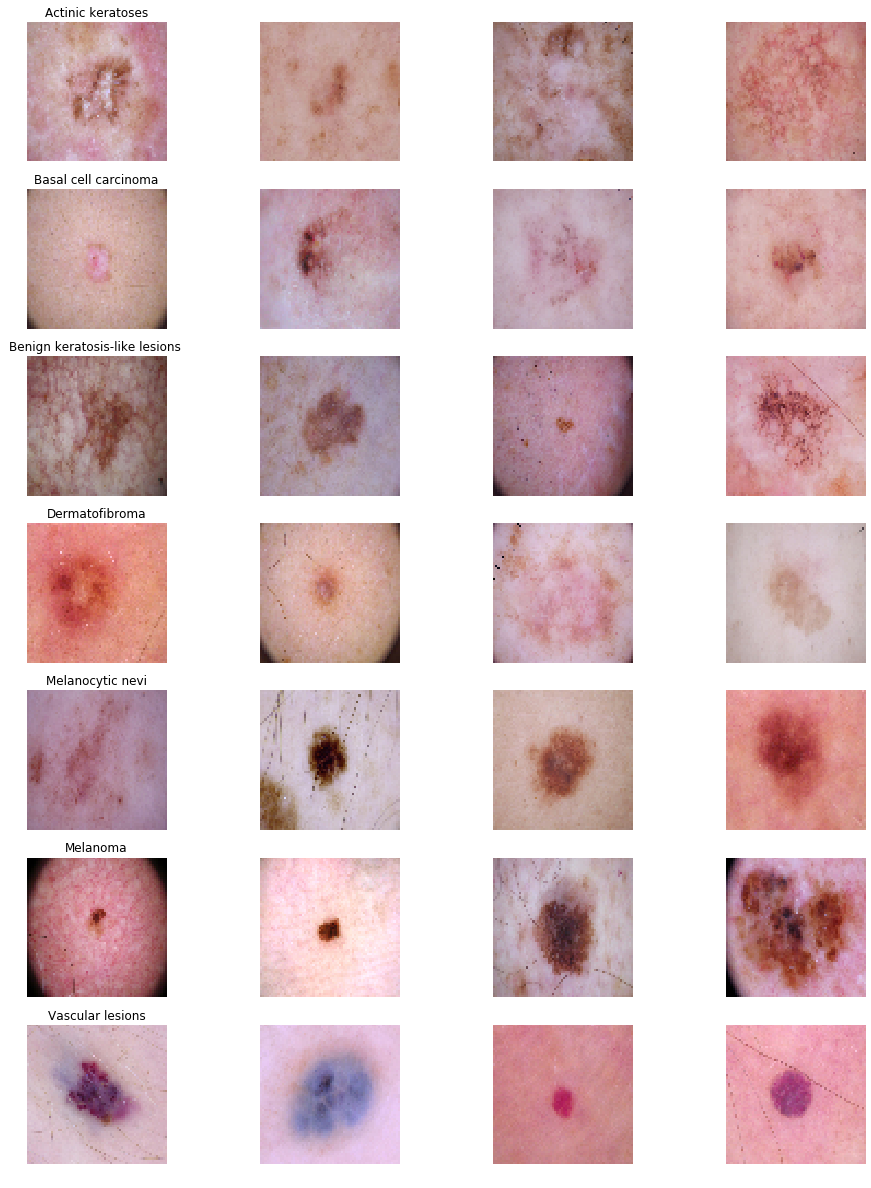

In [17]:
DIE()
import matplotlib.pyplot as plt
fig, m_axs = plt.subplots(7, 4, figsize = (4*4, 3*7))
for n_axs, (type_name, type_rows) in zip(m_axs,dataset.sort_values(['cell_type']).groupby('cell_type')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(7, random_state=1).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')
fig.savefig('category_samples.png', dpi=300)

### _Step 6:- Selecting the features and targets_

In [18]:
features=dataset.drop(columns=['cell_codes'],axis=1)
target=dataset['cell_codes']

### _Step 5:- Train test splitting_

In [19]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(features, target, test_size=0.20,random_state=2)

### _Step 6:- Normalising the training set_

Normalisation reduces data redundancy.It is a process to eliminate the flaws of a database with bad design. A poorly designed database is inconsistent and create issues while adding, deleting or updating information.

In [20]:
x_train = np.asarray(x_train1['image'].tolist())
x_test = np.asarray(x_test1['image'].tolist())

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)

x_test_mean = np.mean(x_test)
x_test_std = np.std(x_test)

x_train = (x_train - x_train_mean)/x_train_std
x_test = (x_test - x_test_mean)/x_test_std

### _Step 7:- Performing one-hot encoding on the labels_

In [21]:
y_train = to_categorical(y_train1, num_classes = 7)
y_test = to_categorical(y_test1, num_classes = 7)

### _Step 8:- Validation and training set splitting_

In [22]:
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size = 0.1, random_state = 2)

### _Step 9:- Reshaping image in 4 dimensions_ 

In [23]:
x_train = x_train.reshape(x_train.shape[0], *(64, 64, 3))
x_test = x_test.reshape(x_test.shape[0], *(64, 64, 3))
x_validate = x_validate.reshape(x_validate.shape[0], *(64, 64, 3))

## _CNN_
### _USING KERAS TENSORFLOW IN BACKEND_

--- 

In this model, we first appply different feature detectors or kernels onto the input image to get the first two convoled layers then we apply Max Pooling to get the max pooled layer and similiarly we obtain the next layers and finally we obtain the Flatten layer using Flatten(). Then the fully connected layers(hidden layers) to finally give the output layer of 7 neurons. 

![title](https://www.researchgate.net/profile/Xiaofei_Yang26/publication/324575020/figure/fig1/AS:672197303615489@1537275734069/The-CNN-model-consisting-of-convolution-layers-pooling-layers-and-full-connection-layer.png)

In [47]:
shape = (64, 64, 3)

classifier = Sequential()
classifier.add(Conv2D(32, (3, 3), activation='relu',input_shape=shape))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size = (2, 2)))
classifier.add(Dropout(0.05))

classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(Conv2D(64, (3, 3), activation='relu'))
classifier.add(MaxPool2D(pool_size=(2, 2)))
classifier.add(Dropout(0.10))

classifier.add(Flatten())

classifier.add(Dense(128, activation='relu'))
classifier.add(Dropout(0.15))
classifier.add(Dense(64, activation='relu'))

classifier.add(Dense(32, activation='relu'))
classifier.add(Dropout(0.20))

classifier.add(Dense(7, activation='softmax'))
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 64)        0         
__________

### _Step 10:- Compiling the model_

In [25]:
classifier.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])

#### _Categorical Cross Entropy_

Categorical cross entropy is a Softmax activation plus a Cross-Entropy loss. While using this loss, we train a CNN to output a probability over the C classes for each image. It is used for multi-class classification.

![title](https://gombru.github.io/assets/cross_entropy_loss/softmax_CE_pipeline.png)

### _Step 12:- Image Augmentation_

![title](https://www.researchgate.net/publication/319413978/figure/fig2/AS:533727585333249@1504261980375/Data-augmentation-using-semantic-preserving-transformation-for-SBIR.png)

In [28]:
datagen = ImageDataGenerator(
                            featurewise_std_normalization=False, 
                            samplewise_std_normalization=False, 
                            rotation_range=10, 
                            zoom_range = 0.1,  
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=False,  
                            vertical_flip=False
                            )
datagen.fit(x_train)

### _Step 13:- Fitting the model_

In [29]:
epochs = 50
batch_size = 10
history = classifier.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_validate,y_validate),
                              steps_per_epoch=x_train.shape[0] // batch_size)

Epoch 1/50
721/721 [==============================] - 92s 127ms/step - loss: 1.0050 - acc: 0.6680 - val_loss: 0.8597 - val_acc: 0.6858
Epoch 2/50
721/721 [==============================] - 96s 134ms/step - loss: 0.9530 - acc: 0.6730 - val_loss: 0.9026 - val_acc: 0.6908
Epoch 3/50
721/721 [==============================] - 100s 139ms/step - loss: 0.9350 - acc: 0.6734 - val_loss: 0.7965 - val_acc: 0.7045
Epoch 4/50
721/721 [==============================] - 98s 136ms/step - loss: 0.9031 - acc: 0.6810 - val_loss: 0.8009 - val_acc: 0.7032
Epoch 5/50
721/721 [==============================] - 100s 139ms/step - loss: 0.8946 - acc: 0.6775 - val_loss: 0.7823 - val_acc: 0.7020
Epoch 6/50
721/721 [==============================] - 103s 142ms/step - loss: 0.8693 - acc: 0.6835 - val_loss: 0.7747 - val_acc: 0.7070
Epoch 7/50
721/721 [==============================] - 101s 140ms/step - loss: 0.8822 - acc: 0.6827 - val_loss: 0.7901 - val_acc: 0.7070
Epoch 8/50
721/721 [==============================]

### _Step 14:- Calculating validation set and test set accuracies_

In [38]:
loss, accuracy = classifier.evaluate(x_test, y_test)
loss_v, accuracy_v = classifier.evaluate(x_validate, y_validate)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Test: accuracy = %f  ;  loss = %f" % (accuracy, loss))
classifier.save("classify.h5")

802/802 [==============================] - 2s 3ms/step
Validation: accuracy = 0.743142  ;  loss_v = 0.678743
Test: accuracy = 0.742886  ;  loss = 0.709888


### _Plotting model's validation loss and validation accuracy_

In [39]:
DIE()
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

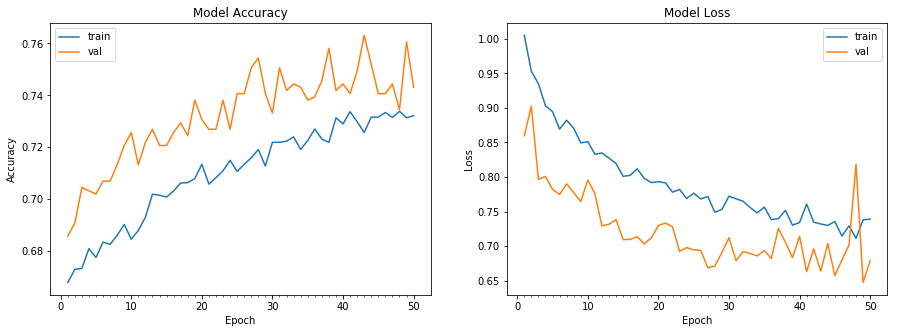

In [40]:
plot_model_history(history)

### _Confusion Matrix_

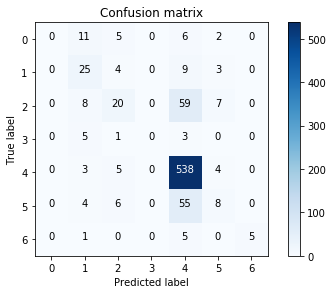

In [41]:
DIE()
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    decoy = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > decoy else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Predicting the values from the validation dataset
Y_pred = classifier.predict(x_validate)
#Converting predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
#Converting validation observations to one hot vectors
Y_true = np.argmax(y_validate,axis = 1) 
#Computing the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)

plot_confusion_matrix(confusion_mtx, classes = range(7)) 

In [3]:
from keras.preprocessing import image
test_image1 = image.load_img('/home/mayur/Desktop/test.jpg', target_size = (64, 64))
test_image1 = image.img_to_array(test_image1)
test_image1 = np.expand_dims(test_image1, axis = 0)
result = classifier.predict(test_image1)
if result[0][0] == 1:
    print('TYPE:-\n Actinic keratoses')
elif result[0][1] == 1:
    print('TYPE:-\n Basal cell carcinoma')
elif result[0][2] == 1:
    print('TYPE:-\n Benign keratosis-like lesions')
elif result[0][3] == 1:
    print('TYPE:-\n Dermatofibroma')
elif result[0][4] ==1 :
    print('TYPE:-\n Melanoma')
elif result[0][5] == 1:
    print('TYPE:-\n Melanocytic nevi')
elif result[0][6] == 1:
    print('TYPE:-\n Vascular lesions')

NameError: name 'classifier' is not defined